# Assignment 3 - Supervised Learning

## *Frank (Huaze) Xu*
Netid:  *hx44*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1+e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the train set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

(a) Likelihood: $L(Y, X) = \prod_{i = 1}^n P(Y = 0|X = x_i)^{1-y_i}~P(Y = 1|X = x_i)^{y_i} = \prod_{i = 1}^n(1-\sigma(\mathbf{w}^T \mathbf{x}_i))^{1-y_i}(\sigma(\mathbf{w}^T \mathbf{x}_i))^{y_i}$

(b) 

$\begin{align}C(w) = - ln(L(Y, X)) &= -\sum_{i = 1}^n [ln((1-\sigma(\mathbf{w}^T \mathbf{x}_i))^{1-y_i})+ln((\sigma(\mathbf{w}^T \mathbf{x}_i))^{y_i})]\\
&= -\sum_{i = 1}^n [(1-y_i)ln(1-\sigma(\mathbf{w}^T \mathbf{x}_i))+y_iln(\sigma(\mathbf{w}^T \mathbf{x}_i))]\\
\end{align}$

(c)

$\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$

for sigmoid function, $\frac{d\sigma(x)}{dx} = \sigma(x)(1-\sigma(x))$

$\begin{align} \frac{\partial C}{\partial w_0} &= \frac{\partial(-\sum_{i = 1}^n [(1-y_i)ln(1-\sigma(\mathbf{w}^T \mathbf{x}_i))+y_iln(\sigma(\mathbf{w}^T \mathbf{x}_i))])}{\partial w_0}\\
&= -\sum_{i = 1}^n \frac{\partial[(1-y_i)ln(1-\sigma(\mathbf{w}^T \mathbf{x}_i))+y_iln(\sigma(\mathbf{w}^T \mathbf{x}_i))]}{\partial\sigma(\mathbf{w}^T \mathbf{x}_i)}\frac{\partial\sigma(\mathbf{w}^T \mathbf{x}_i)}{\partial \mathbf{w}^T \mathbf{x}_i}\frac{\partial \mathbf{w}^T \mathbf{x}_i}{\partial w_0}\\
&= -\sum_{i = 1}^n\frac{-\sigma(\mathbf{w}^T \mathbf{x}_i)+y_i}{\sigma(\mathbf{w}^T \mathbf{x}_i)(-\sigma(\mathbf{w}^T \mathbf{x}_i)+1)}\sigma(\mathbf{w}^T \mathbf{x}_i)(1-\sigma(\mathbf{w}^T \mathbf{x}_i))x_{i,0}\\
&= \sum_{i = 1}^n (\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,0}
\end{align}$

Samely, 

$\frac{\partial C}{\partial w_1} = \sum_{i = 1}^n (\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,1}$  
$\frac{\partial C}{\partial w_2} = \sum_{i = 1}^n (\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)x_{i,2}$

Therefore, $\nabla_{\mathbf{w}}C(\mathbf{w}) = \sum_{i = 1}^n (\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)\left[x_{i,0}, x_{i,1}, x_{i,2}\right]$

(d) 

$\theta_{new} = \theta - \eta \nabla_{\mathbf{w}}C(\mathbf{w}) = \theta - \eta \sum_{i = 1}^n (\sigma(\mathbf{w}^T \mathbf{x}_i)-y_i)\left[x_{i,0}, x_{i,1}, x_{i,2}\right]$

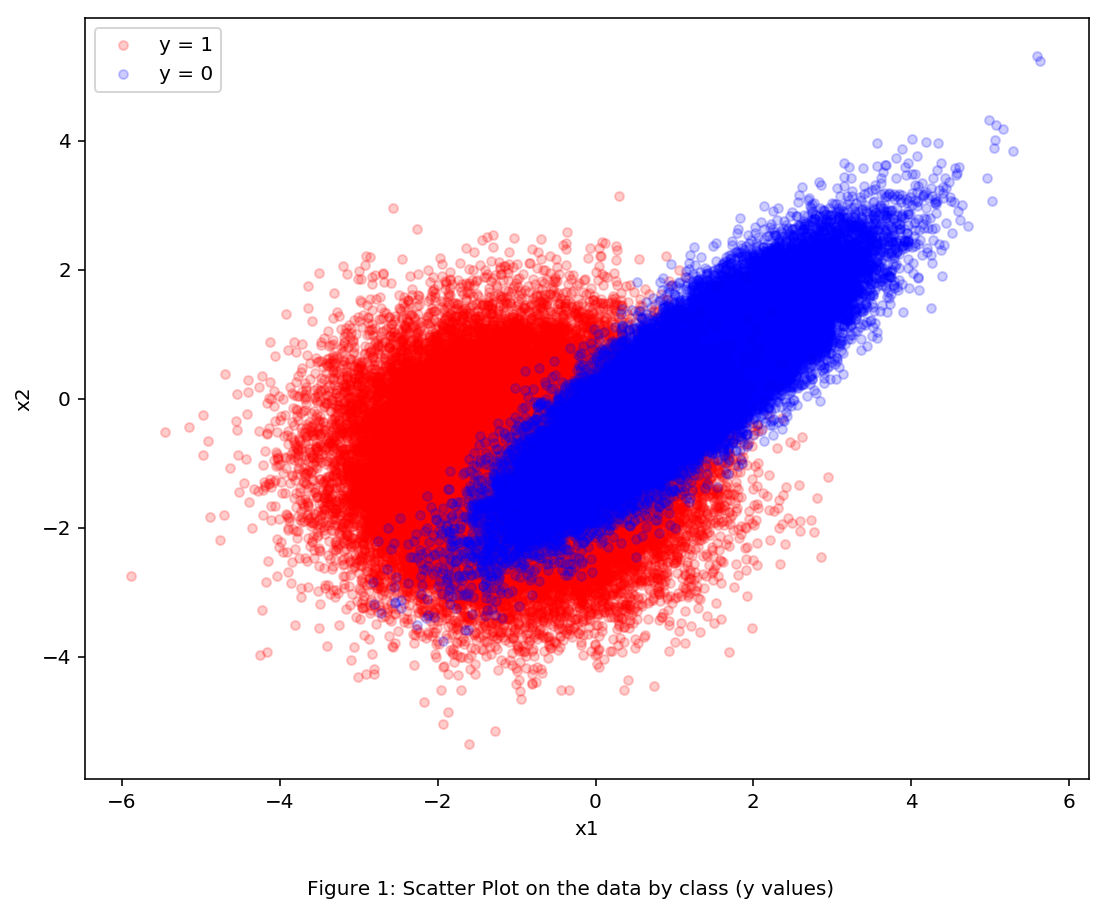

In [189]:
# (e) Load data
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('A3_Q1_data.csv')

# Plotting
fig = plt.figure(figsize=(9, 7))
plt.scatter(x= data[data.y == 1].x1, y = data[data.y == 1].x2, c = 'Red', s = 20, alpha = 0.2, label = 'y = 1')
plt.scatter(x= data[data.y == 0].x1, y = data[data.y == 0].x2, c = 'Blue', s = 20, alpha = 0.2, label = 'y = 0')
plt.legend()
plt.xlabel("x1") 
plt.ylabel("x2") 
fig.text(.5, .01, 'Figure 1: Scatter Plot on the data by class (y values)', ha='center')
plt.show()

(e)
The data does not seem separable.
Therefore logistic regression seems to be a good choice, since you don't have to worry about perfect separation and the MLE function will work fine.

In [190]:
#(f) Check if any column has missing values
print(data.isnull().any())

x1    False
x2    False
y     False
dtype: bool


There seems to be no missing values in data, and the scatter plot also tells that there is no scale difference. No need to remediate.

In [191]:
#(g) logistic regression function
def regression(w, data):
    # w is supposed to be a list or array with shape [w0, w1, w2,...]
    # data is supposed to be a df which columns are [x1, x2,....]
    w = np.array(w)
    x_data = data[['x1','x2']]
    x_data.insert(loc=0, column='x0', value=1)
    prod = x_data.dot(w)
    sigm = np.exp(prod)/(1+np.exp(prod))
    return sigm

#(h) cost function
def cost(w, data):
    data = data.copy()
    reg = regression(w, data)
    data['cost'] = (1-data.y) * np.log(1 - reg + 1e-8) + data.y * np.log(reg)
    return(-np.sum(data.cost)/len(data))

# Separating data to training and testing
train=data.sample(frac=0.7,random_state=123)
test=data.drop(train.index)

# Initializing Weights
w_init = np.random.random_sample((3,))

#(i) gradient descent function
def GD(train = train, validation = False, val_data = test, eta = 2, numIterations = 200, w = w_init.copy(), output = True):
    w = w_init.copy()
    x_data = train[['x1','x2']]
    x_data.insert(loc=0, column='x0', value=1)
    iteration, cost_train, cost_val = [],[],[]
    for i in range(0, numIterations):
        iteration.append(i)
        cost_train.append(cost(w, train))
        cost_val.append(cost(w, val_data))
        if output:
            print("Iteration {} | Training Cost: {}".format(i, cost(w, train)), ", Validation Cost: {};".format(cost(w, val_data)) if validation == True else ';')
        w_prev = w.copy()
        w -= eta * np.dot(x_data.T, (regression(w, train)-train.y))/len(data)
        if np.absolute(np.sqrt(np.sum((w-w_prev)**2)))<=1e-6 and output:
            print('Reached stopping criteria: cost function changes by no more than 1e−6 between iterations')
            break
    return w, iteration, cost_train, cost_val


Iteration 0 | Training Cost: 0.8267217141037969 , Validation Cost: 0.8265711091644402;
Iteration 1 | Training Cost: 0.37068237107180435 , Validation Cost: 0.3758288548310958;
Iteration 2 | Training Cost: 0.34197457080561366 , Validation Cost: 0.34668549816066735;
Iteration 3 | Training Cost: 0.33132974373494534 , Validation Cost: 0.33588560514539617;
Iteration 4 | Training Cost: 0.32807513857356513 , Validation Cost: 0.3325908092958698;
Iteration 5 | Training Cost: 0.3270796423521611 , Validation Cost: 0.33158626205680586;
Iteration 6 | Training Cost: 0.32668055102321103 , Validation Cost: 0.3311839114954034;
Iteration 7 | Training Cost: 0.3264621842432241 , Validation Cost: 0.3309636167717886;
Iteration 8 | Training Cost: 0.32632335154497366 , Validation Cost: 0.33082393980075014;
Iteration 9 | Training Cost: 0.32623100349576906 , Validation Cost: 0.3307318587651964;
Iteration 10 | Training Cost: 0.3261687973829717 , Validation Cost: 0.3306708800964068;
Iteration 11 | Training Cost: 0

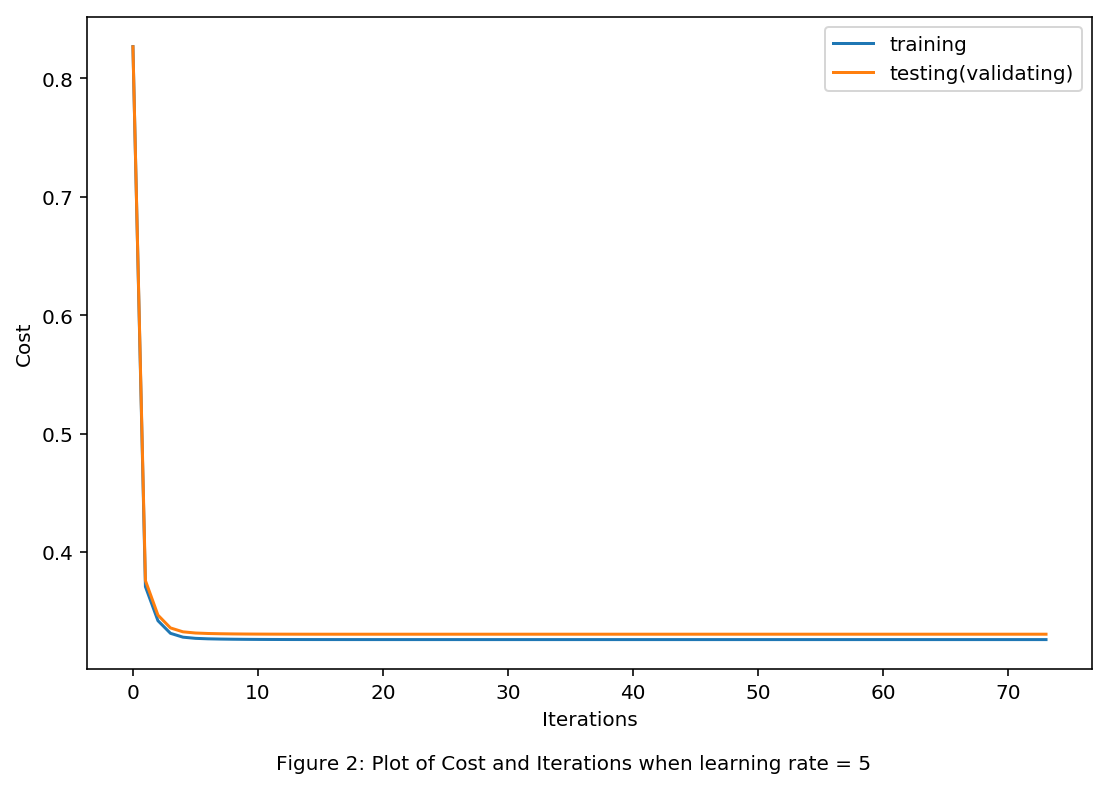

In [192]:
#(j) 
result = GD(train = train, validation = True, val_data = test, eta = 5)
i, c_train, c_test = result[1], result[2], result[3]
fig = plt.figure(figsize=(9, 6))
plt.plot(i, c_train, label = 'training')
plt.plot(i, c_test, label = 'testing(validating)')
plt.legend()
plt.xlabel("Iterations") 
plt.ylabel("Cost") 
fig.text(.5, .01, 'Figure 2: Plot of Cost and Iterations when learning rate = 5', ha='center')
plt.show()

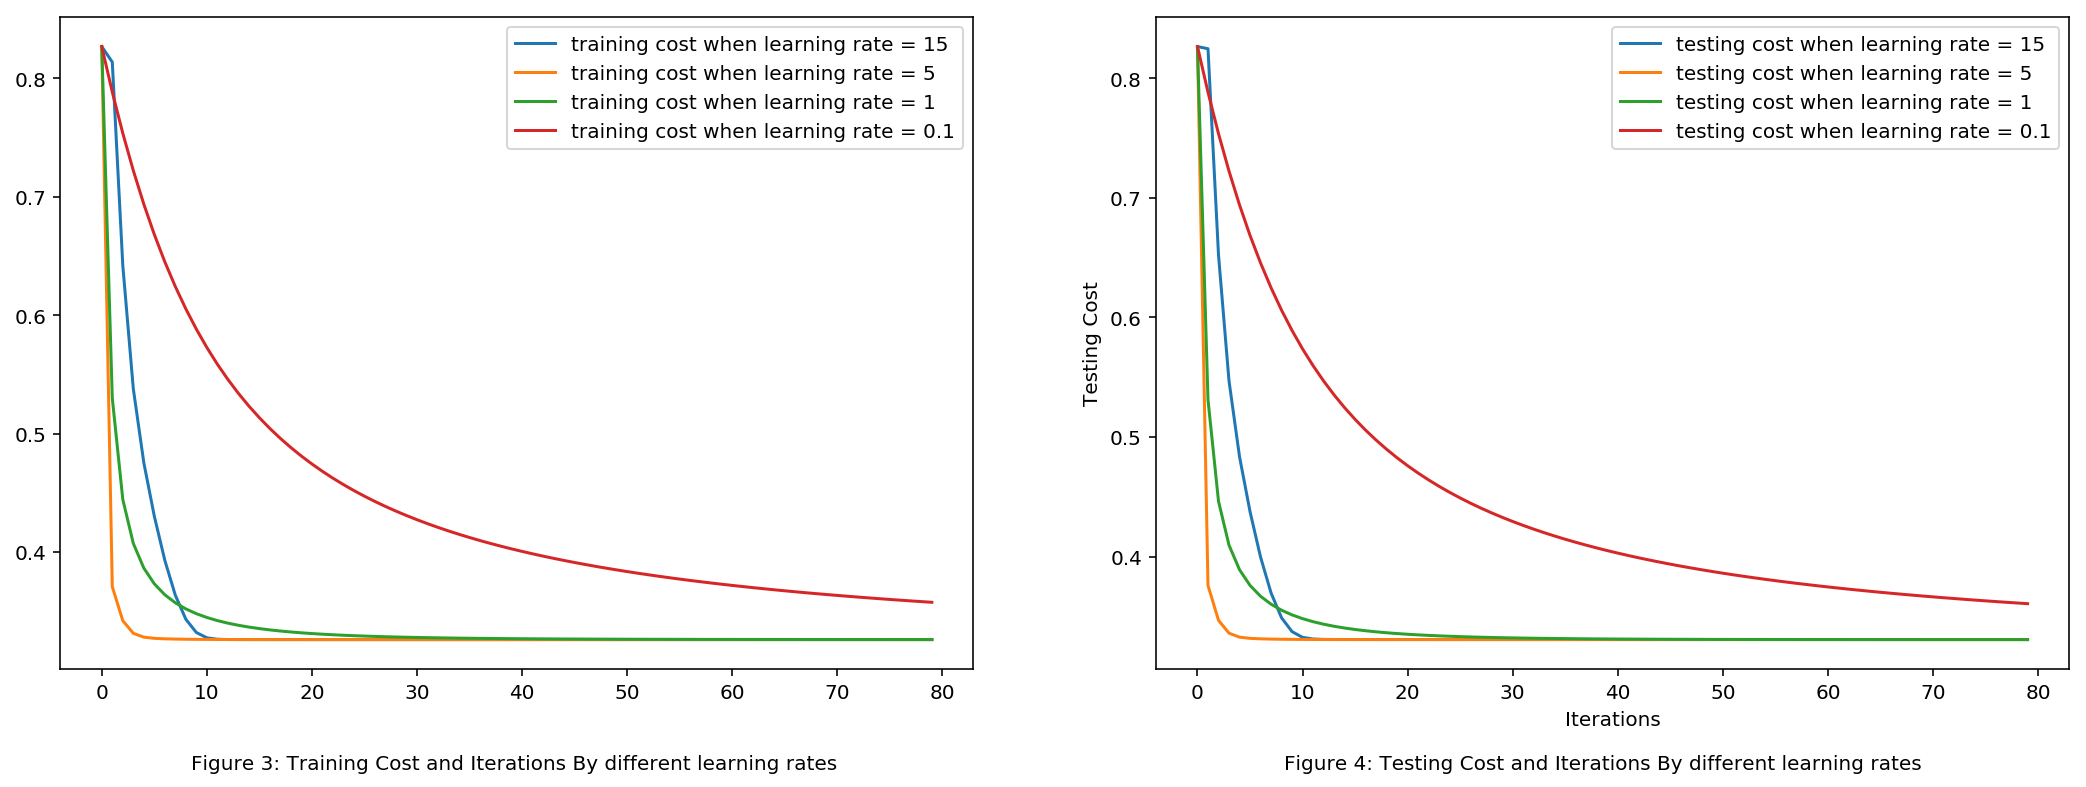

In [193]:
#(k) Plotting

# Creating learning rates
eta = [15, 5, 1, 0.1]

# Plotting
fig = plt.figure(figsize=(18, 6))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)

# Creating plotting data
for e in eta:
    w = w_init.copy()
    x_data = train[['x1','x2']]
    x_data.insert(loc=0, column='x0', value=1)
    iteration, cost_train, cost_test = [],[],[]
    for i in range(0, 80):
        iteration.append(i)
        cost_train.append(cost(w, train))
        cost_test.append(cost(w,test))
        w -= e * np.dot(x_data.T, (regression(w, train)-train.y))/len(data)
    
    # Plotting the training data
    ax1.plot(iteration, cost_train, label = 'training cost when learning rate = {}'.format(e))
    ax1.legend(loc = 'upper right')
    plt.xlabel("Iterations") 
    plt.ylabel("Training Cost") 
    
    # Plotting the testing data
    ax2.plot(iteration, cost_test, label = 'testing cost when learning rate = {}'.format(e))
    ax2.legend(loc = 'upper right')
    plt.xlabel("Iterations") 
    plt.ylabel("Testing Cost")
    
fig.text(.3, .01, 'Figure 3: Training Cost and Iterations By different learning rates', ha='center')
fig.text(.72, .01, 'Figure 4: Testing Cost and Iterations By different learning rates', ha='center')
plt.show()

(k) 

***Q: What is the impact that each parameter has on the process and the results?***

***A:*** The learning rate impact the performance of the model: if the rate is too low (like the redline in the plot, eta = 0.1), then it would take too long for the model to fit the data; if the rate is too high (not shown in the graph, when eta >= 20), then it cannot even descent to the minimum cost.

   The initial weights will impact the initial cost of the model, but it would not have big impact on number of iterations and the final weights of the model.

   The Stopping criteria will decide how much iterations the model will run. If the stopping criteria (difference of cost between iterations) is set too small, then the model is more likely to run more iterations and more likely to overfit. If the criteria is too big, then the model is more likely to stop before fitting the right weights.

***Q: What choices did you make in your chosen approach and why?***

***A:*** I will use eta = 5 (as the yellow line in the plot above) as my learning rate, because it fit the right value quickly, which means the rate is neither too high or too low, which can be accurate, and at the same time more efficient.

Finished validating fold number 1/5;
Finished validating fold number 2/5;
Finished validating fold number 3/5;
Finished validating fold number 4/5;
Finished validating fold number 5/5;


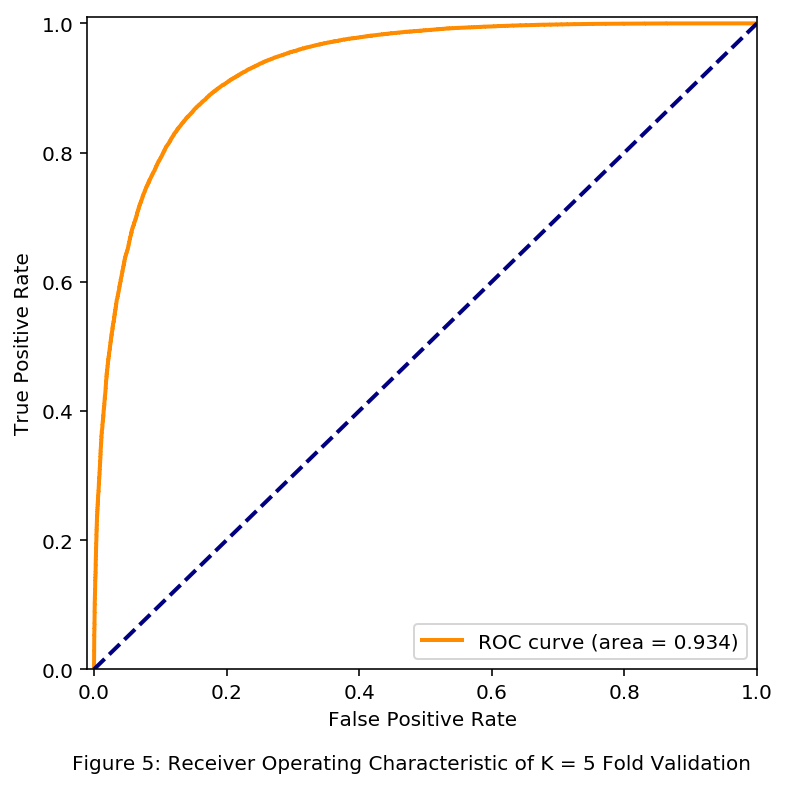

In [194]:
#(l)
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc

# Choose Number of Folds
k = 5

# Creating KFold object and prepare data
kf = StratifiedKFold(n_splits = k)
X, y, i = data[['x1','x2']], data.y, 1
data['pred'] = 0

# Creating K-fold Validation Predictions
for train_index, test_index in kf.split(X,y):
    data_train = data.iloc[train_index]
    data_test = data.iloc[test_index]
    result = GD(train = data_train, validation = False, eta = 5, output = False)
    w = result[0]
    data.loc[test_index, 'pred'] = regression(w, data_test)
    print('Finished validating fold number {}/{};'.format(i,k))
    i+= 1
    pass

# Creating ROC function
def plot_roc(fpr, tpr, auc):
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {0:0.3f})'.format(auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([-0.01, 1.0])
    plt.ylim([0.0, 1.01])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")

# Plotting ROC curves
fpr, tpr, _ = roc_curve(data.y, data.pred)
roc_auc = auc(fpr, tpr)
fig = plt.figure(figsize=(6, 6))
plot_roc(fpr, tpr, roc_auc)
fig.text(.5, .01, 'Figure 5: Receiver Operating Characteristic of K = {} Fold Validation'.format(k), ha='center')
plt.show()    

(m) 

***Q: Why do we use cross validation?***

***A:*** We use cross validation because it allows us to repeatedly train and test on one single set of data. Also, through cross validation we can measure model performance, and (under certain circumstances) choose the right model to adopt.

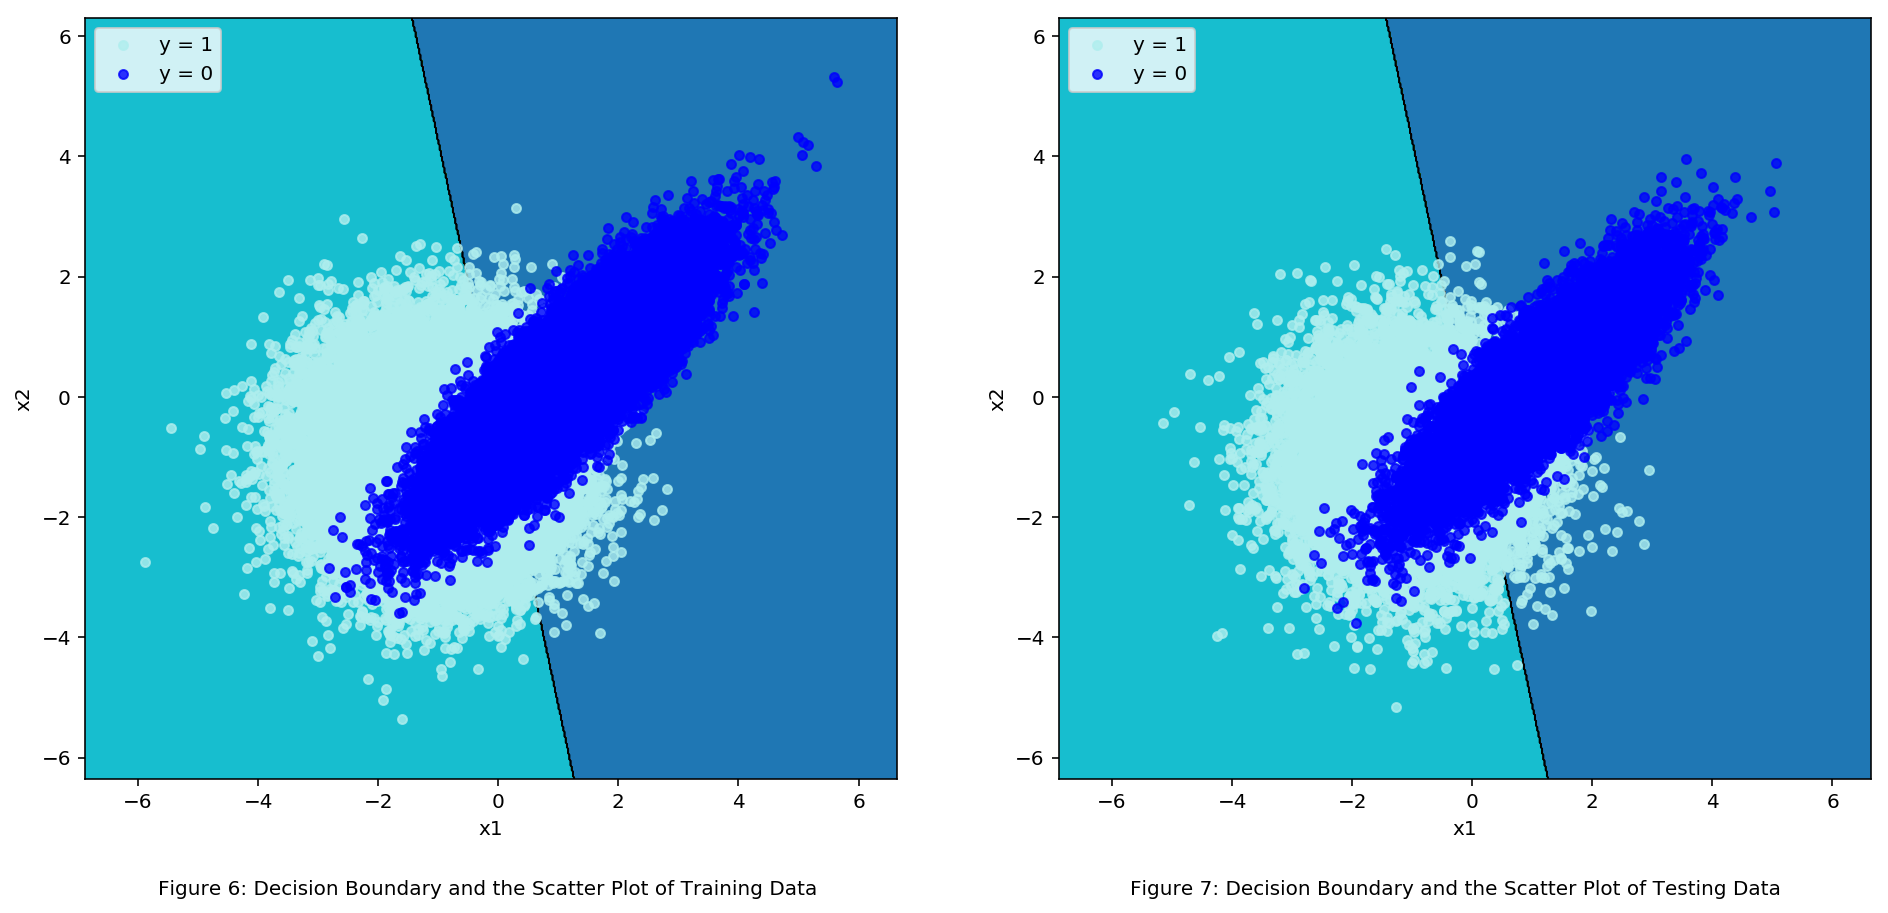

In [195]:
#(n)
# Importing the trained weight on training data
result = GD(train = train, validation = False, eta = 5, output = False)
w = result[0]
# Meshgriding
x1_min, x1_max = data.values[:, 0].min() - 1, data.values[:, 0].max() + 1
x2_min, x2_max = data.values[:, 1].min() - 1, data.values[:, 1].max() + 1
x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

# Regression on the meshgriding data
z = regression(w = w, data = pd.DataFrame({'x1':x1.ravel(), 'x2':x2.ravel()})).values
z[z>=0.5] = 1
z[z<0.5] = 0
z = z.reshape(x1.shape)

# Plotting
fig = plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.contourf(x1, x2, z, cmap = 'tab10', zorder = 1)
plt.contour(x1, x2, z, colors = "Black", linewidths = 0.5, zorder = 2)
#plt.scatter(train.values.T[0],train.values.T[1], c = train.values.T[2], s = 20, cmap = 'Blues_r', zorder = 3)
plt.scatter(x= train[train.y == 1].x1, y = train[train.y == 1].x2, c = 'paleturquoise', s = 20, alpha = 0.8, label = 'y = 1', zorder = 3)
plt.scatter(x= train[train.y == 0].x1, y = train[train.y == 0].x2, c = 'blue', s = 20, alpha = 0.8, label = 'y = 0', zorder = 4)
plt.legend(loc="upper left")
plt.xlabel("x1") 
plt.ylabel("x2") 
fig.text(.3, .01, 'Figure 6: Decision Boundary and the Scatter Plot of Training Data', ha='center')

plt.subplot(1, 2, 2)
plt.contourf(x1, x2, z, cmap = 'tab10', zorder = 1)
plt.contour(x1, x2, z, colors = "Black", linewidths = 0.5, zorder = 2)
#plt.scatter(train.values.T[0],train.values.T[1], c = train.values.T[2], s = 20, cmap = 'Blues_r', zorder = 3)
plt.scatter(x= test[test.y == 1].x1, y = test[test.y == 1].x2, c = 'paleturquoise', s = 20, alpha = 0.8, label = 'y = 1', zorder = 3)
plt.scatter(x= test[test.y == 0].x1, y = test[test.y == 0].x2, c = 'blue', s = 20, alpha = 0.8, label = 'y = 0', zorder = 4)
plt.legend(loc="upper left")
plt.xlabel("x1") 
plt.ylabel("x2") 
fig.text(.72, .01, 'Figure 7: Decision Boundary and the Scatter Plot of Testing Data', ha='center')

plt.show()

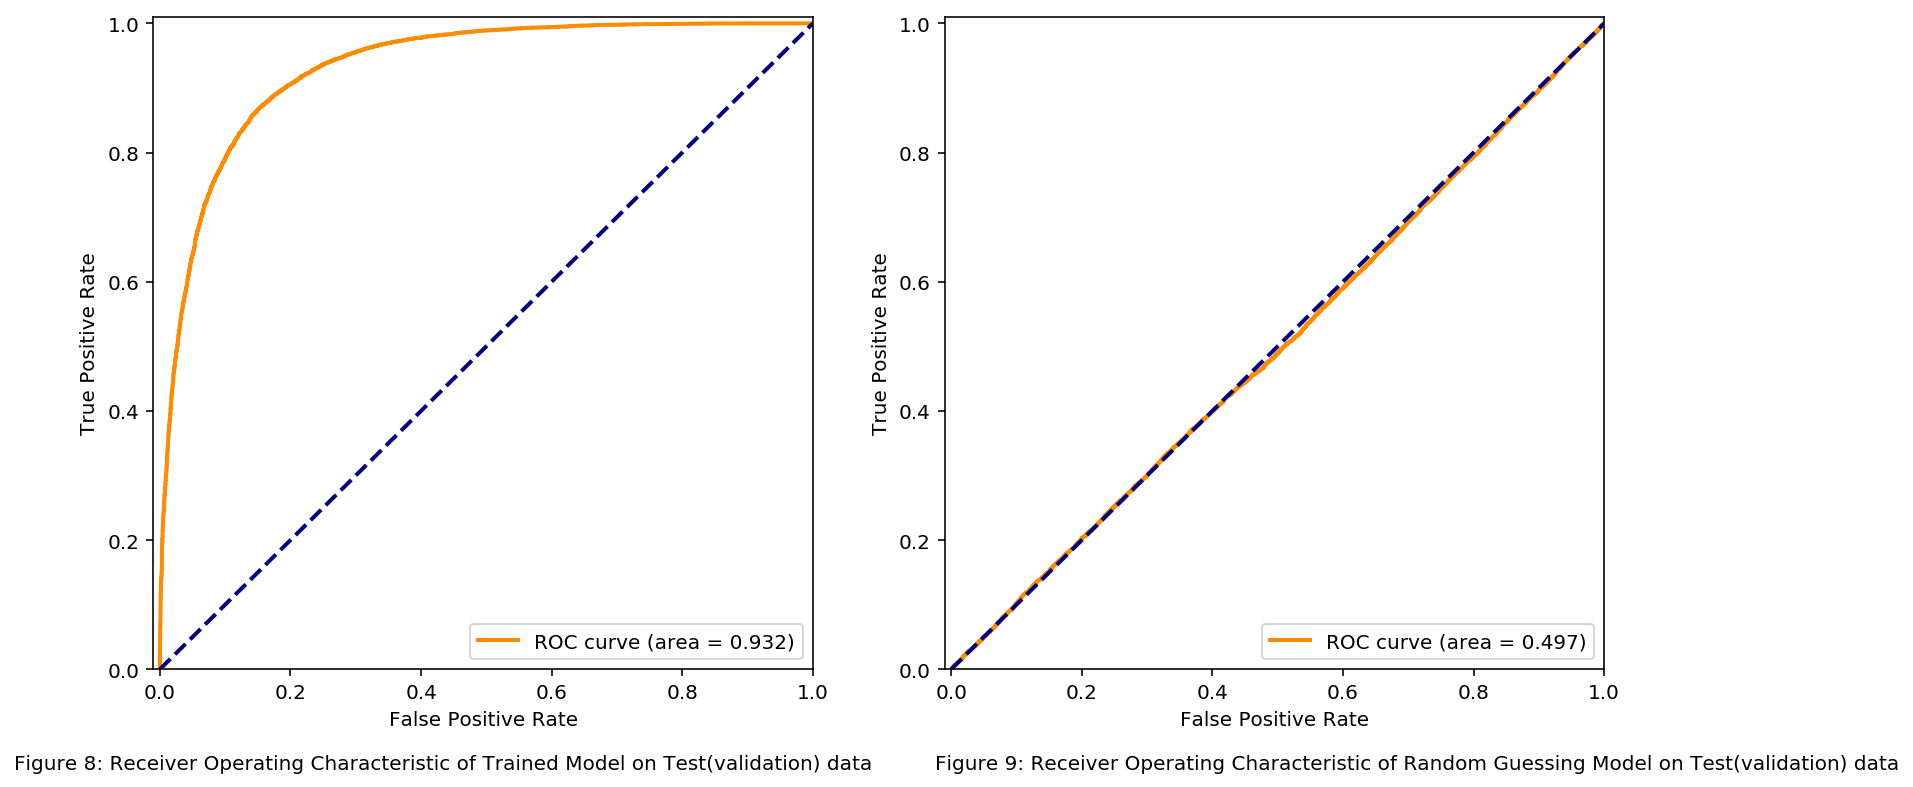

In [196]:
#(o)
test['pred'] = regression(w, test)
test['guess'] = np.random.sample(len(test))
fig = plt.figure(figsize=(13, 6))

for idx, item in enumerate([test.pred, test.guess]):
    fpr, tpr, _ = roc_curve(test.y, item)
    roc_auc = auc(fpr, tpr)
    plt.subplot(1, 2, idx+1)
    plot_roc(fpr, tpr, roc_auc)
fig.text(.28, .01, 'Figure 8: Receiver Operating Characteristic of Trained Model on Test(validation) data'.format(k), ha='center')
fig.text(.8, .01, 'Figure 9: Receiver Operating Characteristic of Random Guessing Model on Test(validation) data'.format(k), ha='center')  
plt.show()

##### (o) The area under curve of trained model is 0.932, while random guessing is around 0.500. The trained model greatly out performanced random guessing model.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [197]:
#(a)
import keras
mnist = keras.datasets.mnist
# Load data
(x_train, y_train),(x_test, y_test) = mnist.load_data()
# Changing labels
y_train[y_train != 3], y_train[y_train == 3] = 0, 1
y_test[y_test != 3], y_test[y_test == 3] = 0, 1

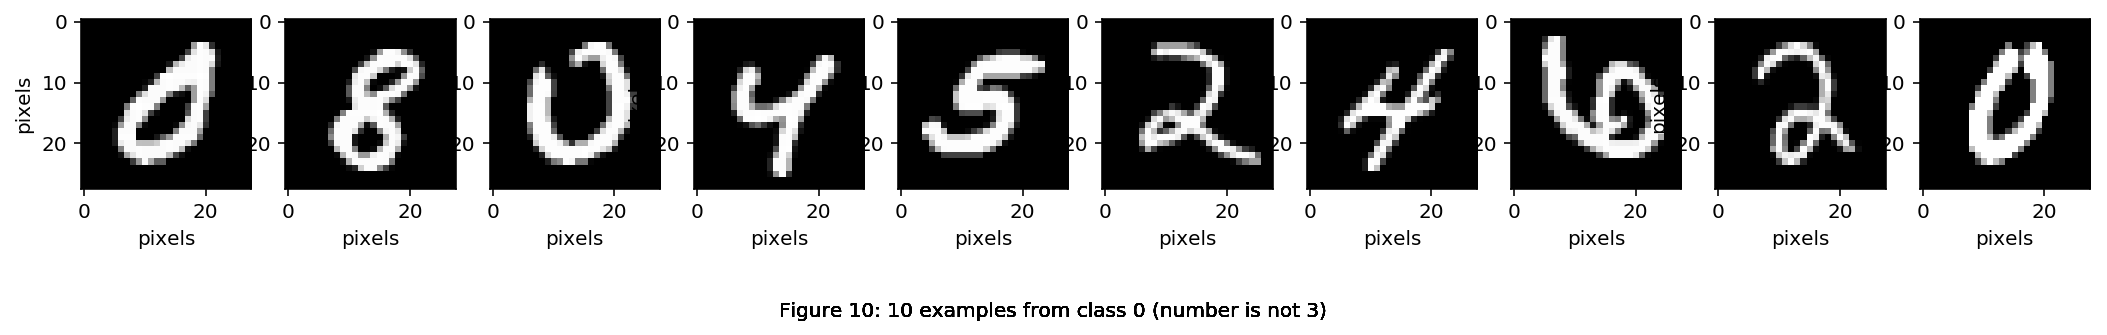

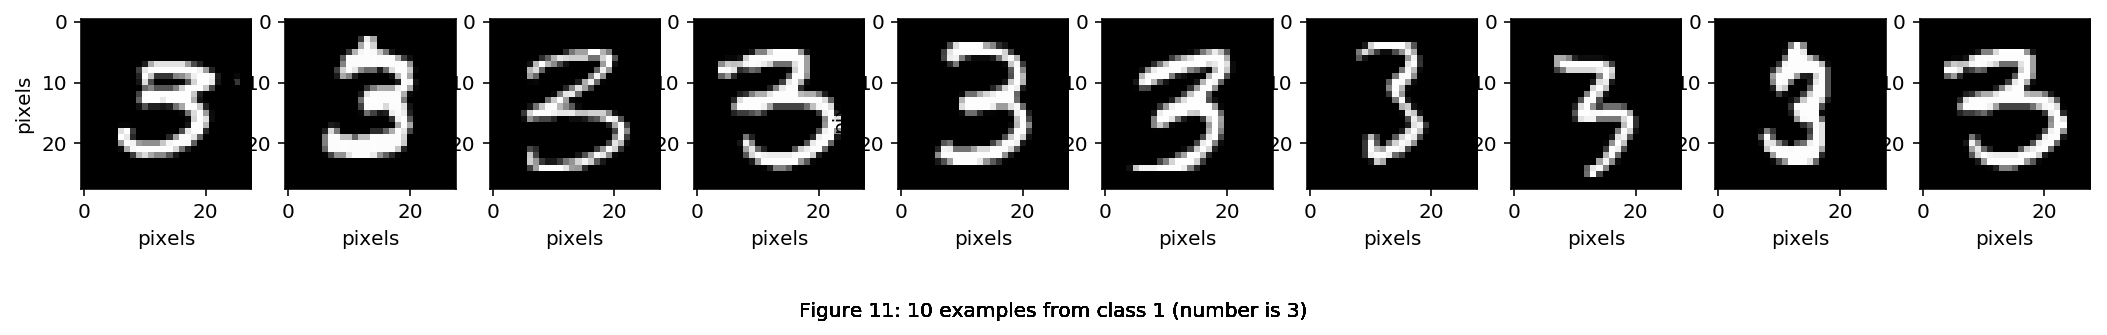

In [198]:
#(b)
# Creating training data with only 3 and the one without 3
x_train_T = x_train[y_train == 1]
x_train_F = x_train[y_train == 0]

# Randomly plot 10 plots from each set
fig = plt.figure(figsize=(18, 3))
for i, j in zip(np.random.randint(0, len(x_train_F), 10), range(1,11)):
    plt.subplot(1, 10, j)
    plt.imshow(x_train_F[i], cmap='gray')
    plt.xlabel("pixels") 
    plt.ylabel("pixels") 
    fig.text(.5, .01, 'Figure 10: 10 examples from class 0 (number is not 3)', ha='center')
plt.show()

fig = plt.figure(figsize=(18, 3))
for i, j in zip(np.random.randint(0, len(x_train_T), 10), range(1,11)):
    plt.subplot(1, 10, j)
    plt.imshow(x_train_T[i], cmap='gray')
    plt.xlabel("pixels") 
    plt.ylabel("pixels")
    fig.text(.5, .01, 'Figure 11: 10 examples from class 1 (number is 3)', ha='center')
plt.show()

There are 53869 examples of class 0 in the training data
There are 6131 examples of class 1 in the training data


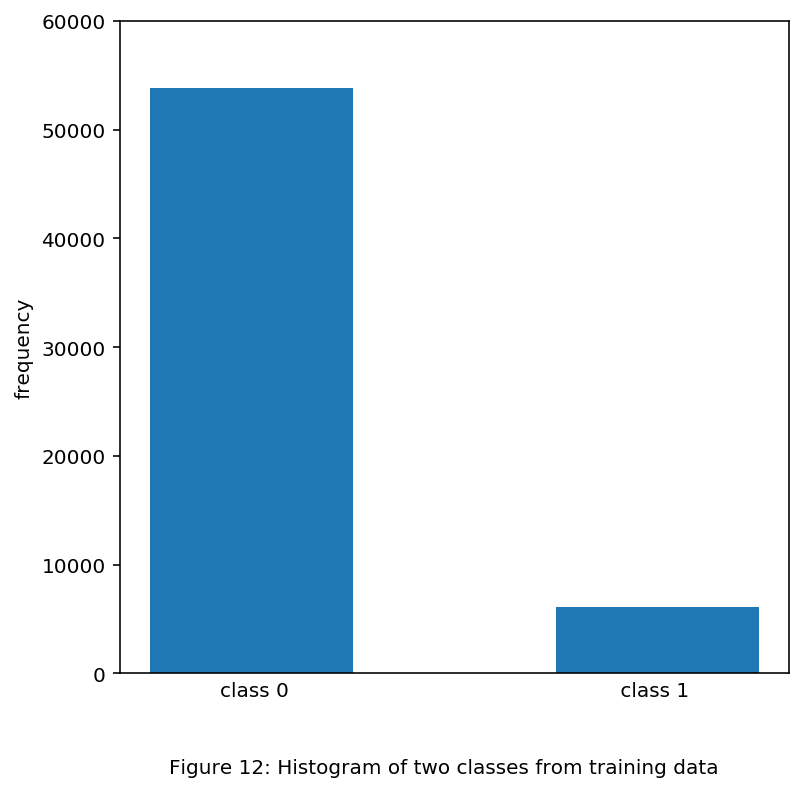

In [199]:
#(c)
print('There are {} examples of class 0 in the training data'.format(len(x_train_F)))
print('There are {} examples of class 1 in the training data'.format(len(x_train_T)))
fig = plt.figure(figsize=(6, 6))
plt.hist(y_train, bins = 3)
plt.ylim([0.0, 60000])
plt.xlabel('class 0                                                    class 1')
plt.ylabel('frequency')
plt.tick_params(axis='x', which='both', bottom=False, labelbottom=False)
fig.text(.5, .01, 'Figure 12: Histogram of two classes from training data', ha='center')
plt.show()

***(c) The classes are not balanced. There are clearly more class 0 than class 1. The reason could be due to large numbers, the appearance of class 1 (number = 3) is about a tenth of the total sample size.***

In [200]:
#(d)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Creating and train a logistic model
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)
lm = LogisticRegression(solver='liblinear', max_iter=180)
lm.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=180, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [201]:
# Model prediction
pred = lm.predict_proba(x_test).T[1]
# Random guessing prediction
guess = np.random.sample(len(x_test))
# All 0 prediction
zero = np.repeat(0, len(x_test))

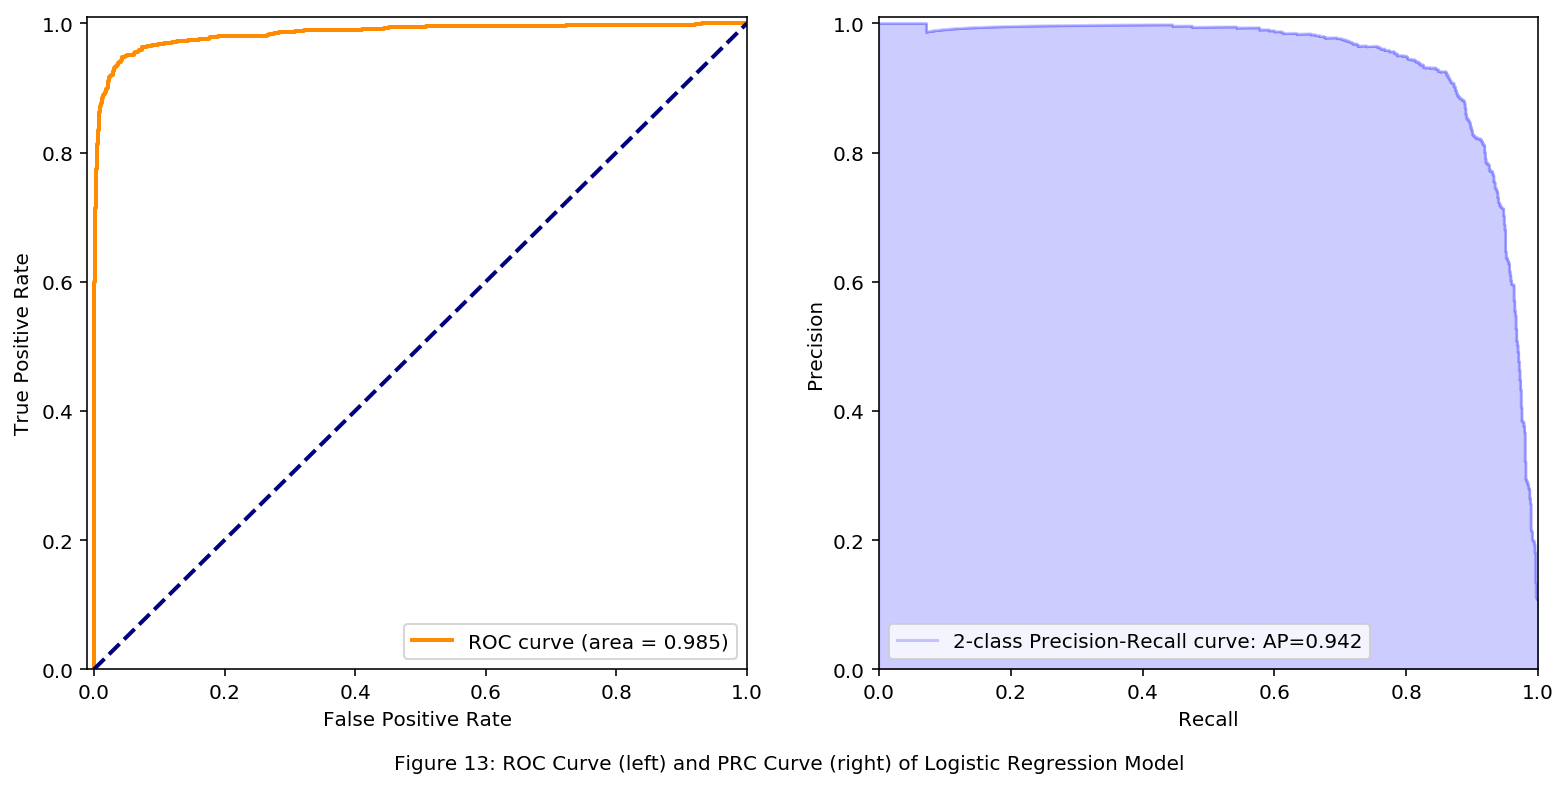

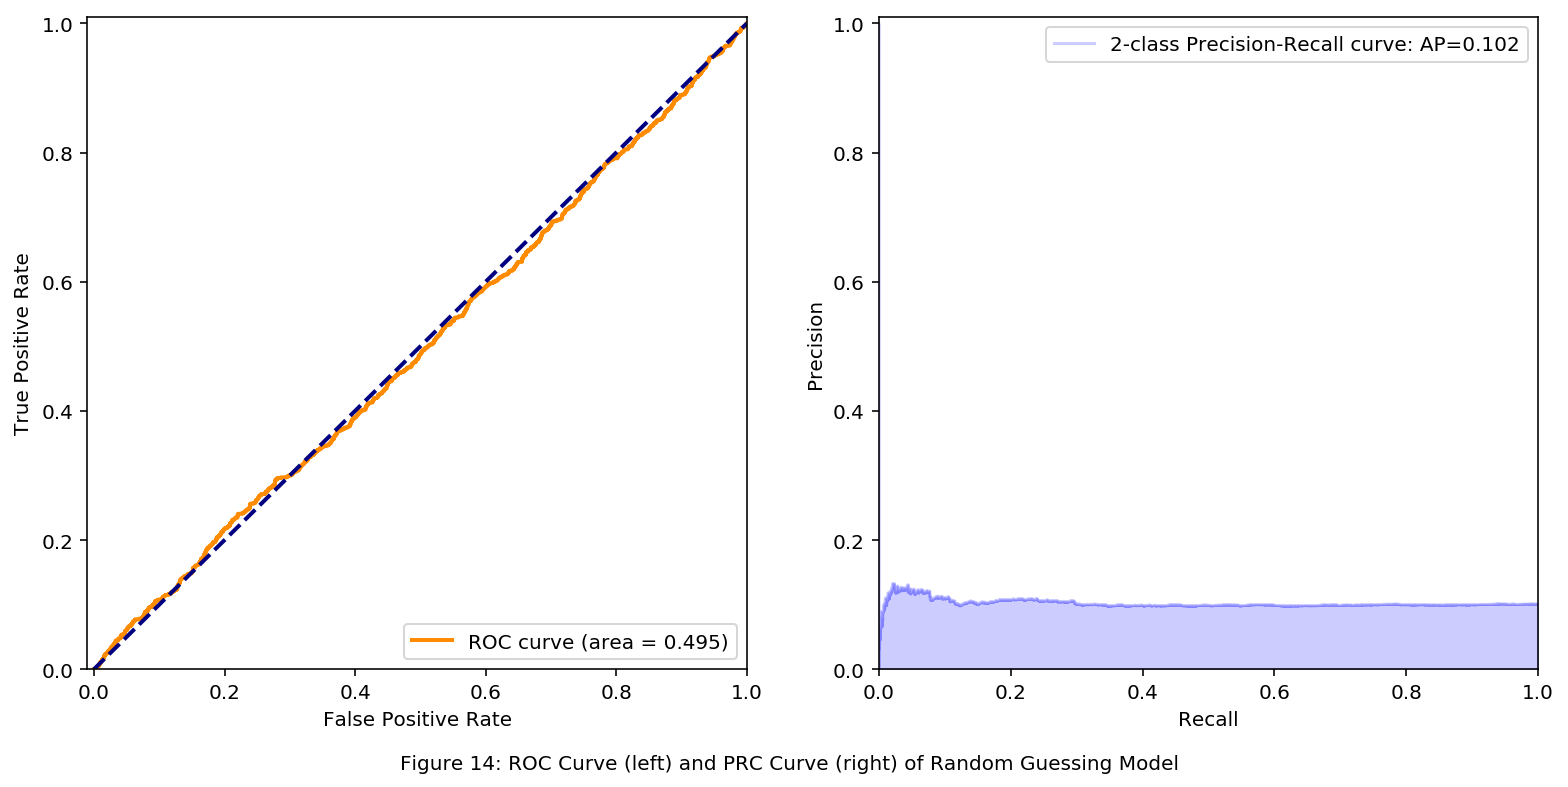

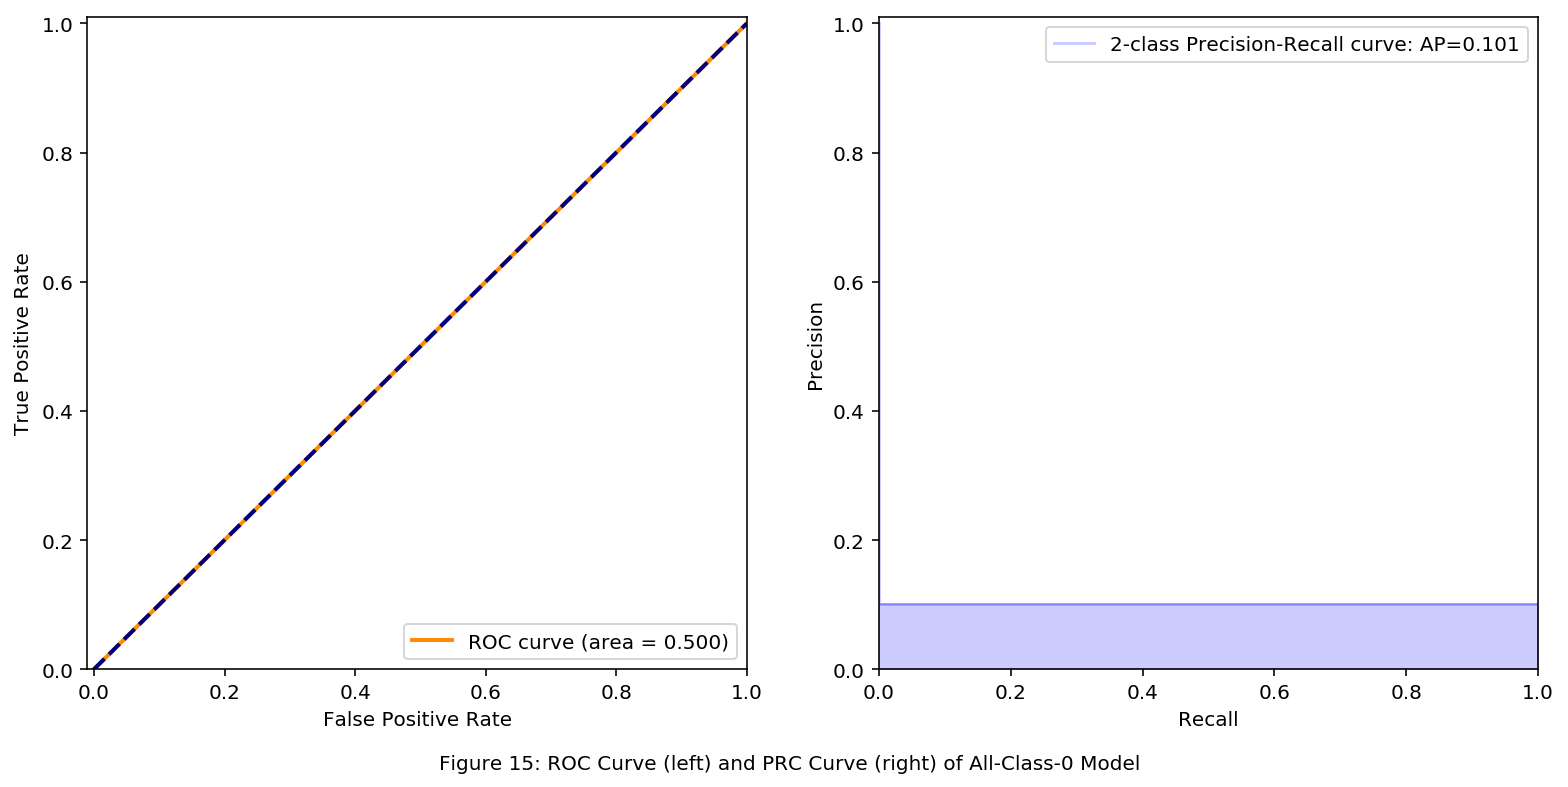

In [202]:
from sklearn.metrics import precision_recall_curve

# Creating PRC function
def plot_prc(precision, recall, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post', label = '2-class Precision-Recall curve: AP={0:0.3f}'.format(average_precision))
    plt.fill_between(recall, precision, alpha=0.2, color='b', step = 'post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.01])
    plt.xlim([0.0, 1.0])
    plt.legend()

for idx, item in enumerate([pred, guess, zero]):
    # Calculating plotting metrics
    fpr, tpr, _ = roc_curve(y_test, item)
    roc_auc = auc(fpr, tpr)
    precision, recall, _ = precision_recall_curve(y_test, item)
    average_precision = average_precision_score(y_test, item)
    # Plotting
    fig = plt.figure(figsize=(13, 6))
    plt.subplot(1,2,1)
    plot_roc(fpr, tpr, roc_auc)
    plt.subplot(1,2,2)
    plot_prc(precision, recall, average_precision)
    fig.text(.5, .01, 'Figure {}: ROC Curve (left) and PRC Curve (right) of {} Model'.format(13+idx, ['Logistic Regression', 'Random Guessing', 'All-Class-0'][idx]), ha='center')
    plt.show()

***The logistic model we trained did pretty good, achieved an auc of 0.984. In comparison, the random guessing and all-class-0 strategy is not doing "predicting" anything.***

***However, those two guessing strategy do have different curves, the all-class-0 one seems to be more smooth/straight than the first one. This is because in the all-class-0 strategy, since all the predictions are negative, there is no true positive and false positive, so the tpr(recall), fpr, precision stayed the same all the time. However in the random guessing strategy, there is some randomness in the prediction, hence the fluctuation around chance diagonal.***

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


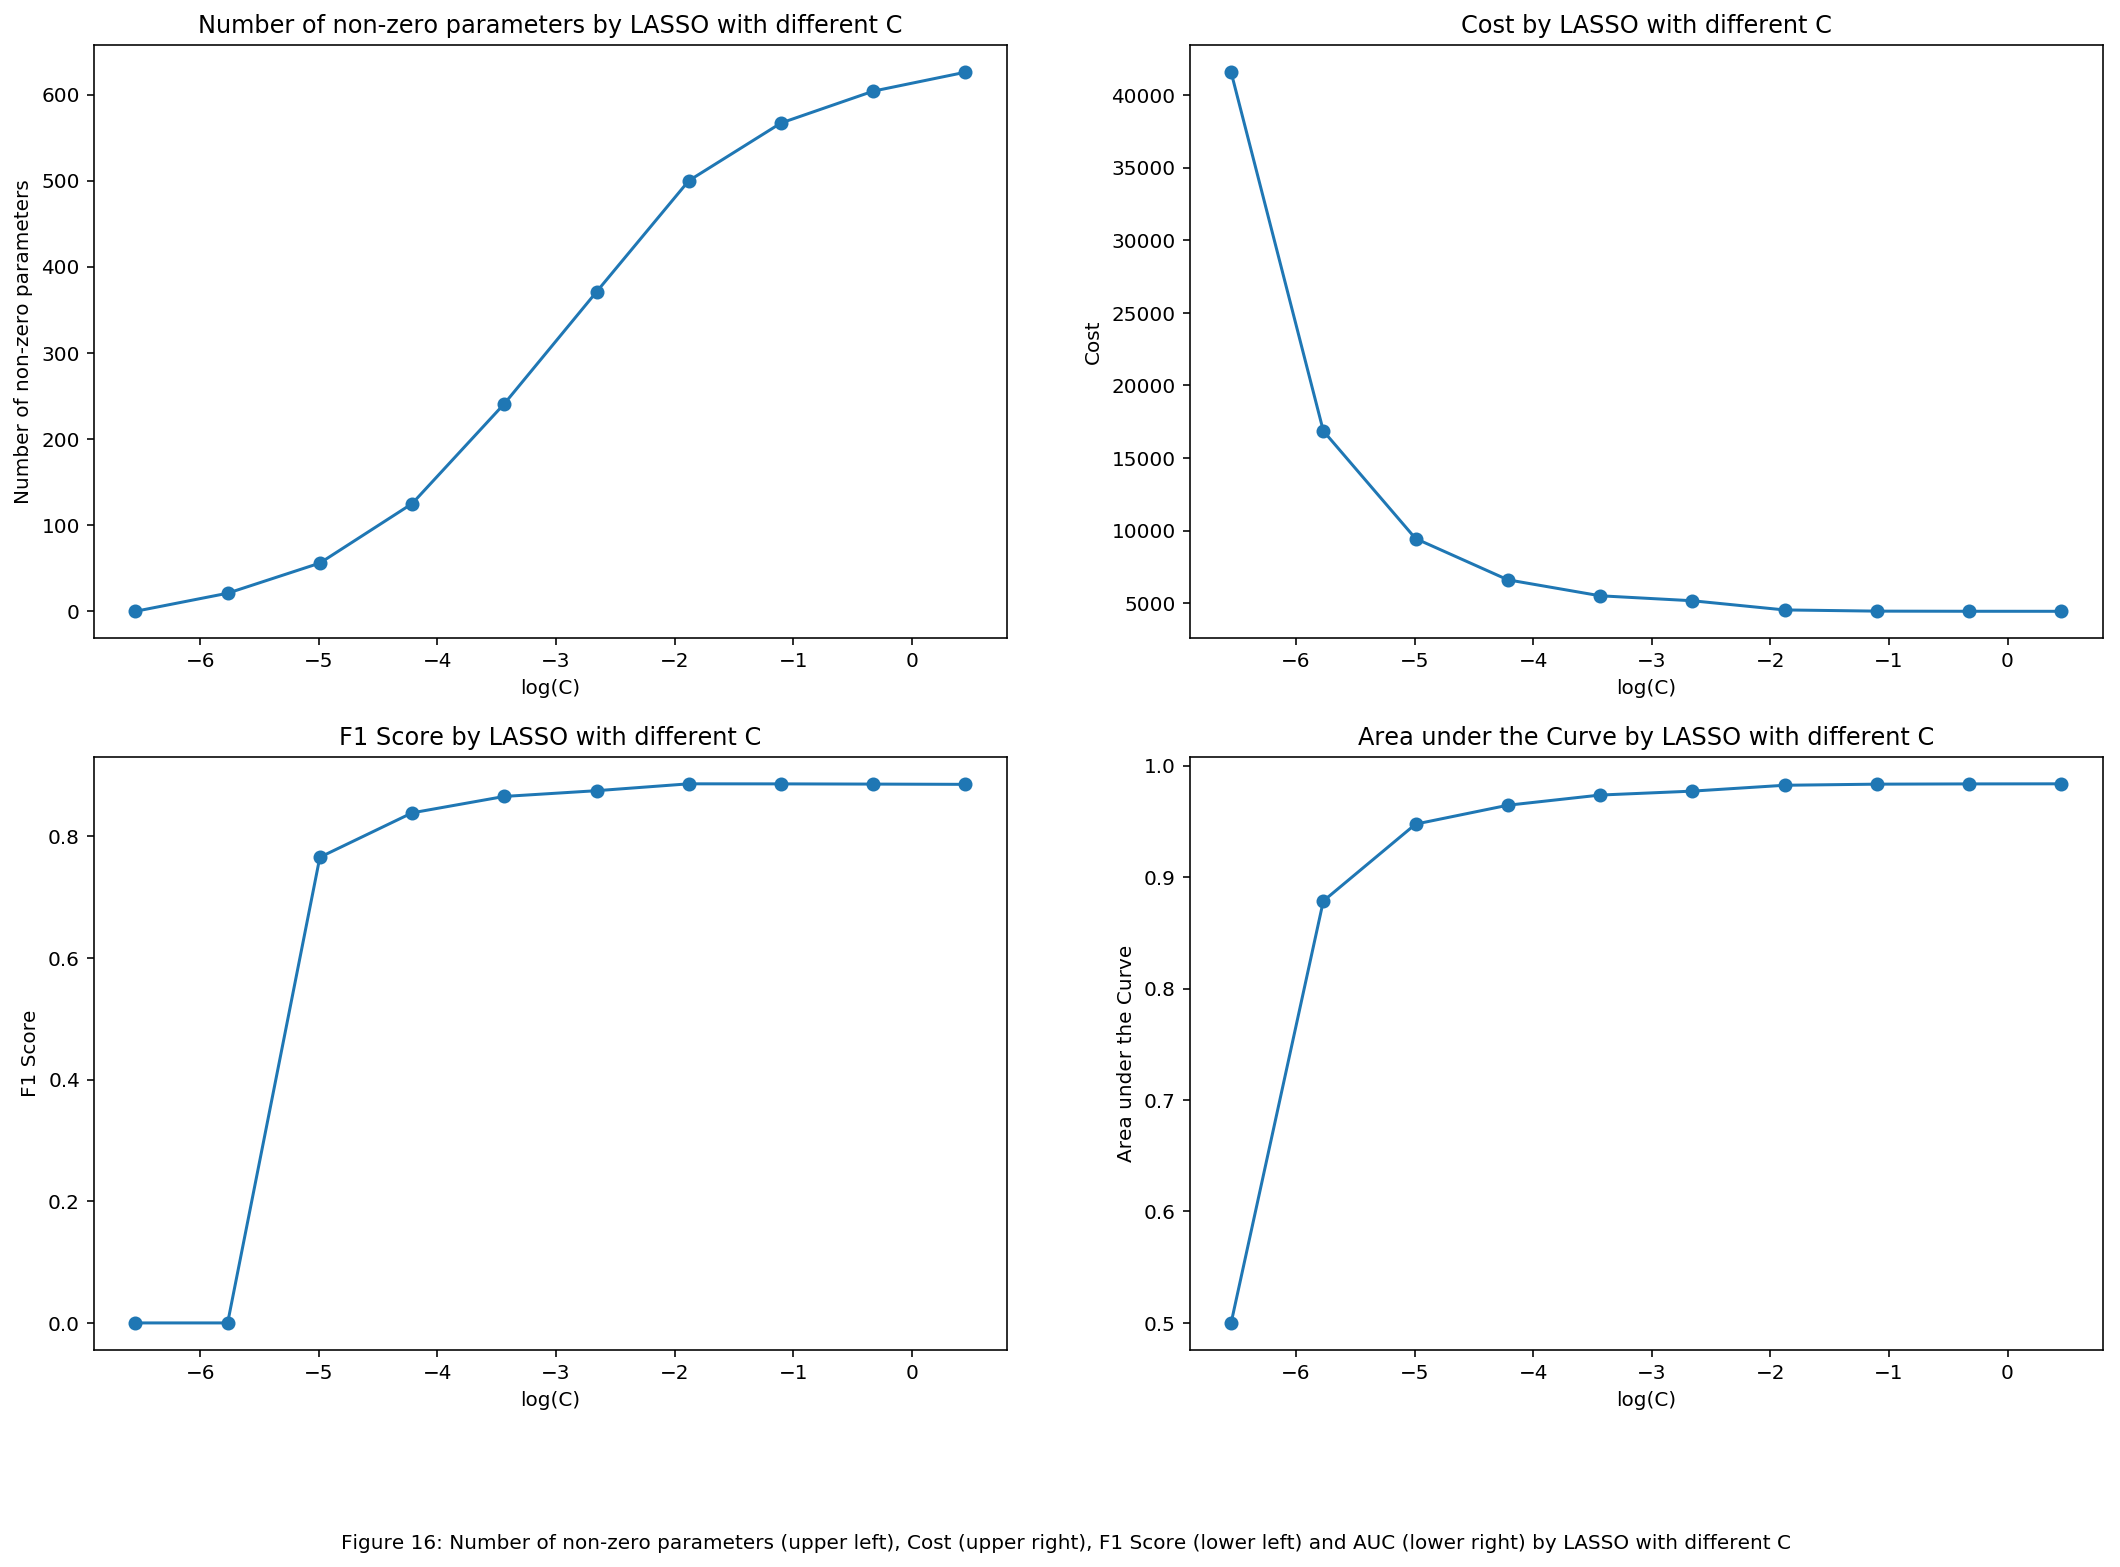

In [203]:
#(e)
from sklearn.metrics import f1_score
from sklearn.svm import l1_min_c
import random

#index = random.sample(range(0, 60000), 5000)
x = x_train
y = y_train

# Define a cost function for this use
def cost_(weight, intercept, x_data, y_data):
    w = np.array(list(intercept) + list(weight))
    x_data = np.array([np.repeat(1, len(x_data))]+list(x_data.T)).T
    prod = x_data.dot(w)
    sigm = np.exp(prod)/(1+np.exp(prod))
    return(-np.sum((1-y_data) * np.log(1 - sigm+ 1e-8) + y_data * np.log(sigm)))

# Initialize Logistic Regression
lm2 = LogisticRegression(penalty='l1', solver='liblinear')

# Creating c in a log space from about -6 to 2
C = l1_min_c(x, y, loss='log')* np.logspace(0, 7, 10)

# Create containers for different plotting attributes
paramsc, costsc, f1sc, aucsc = [],[],[],[]

for c in C:
    # Go through every c score and generate 
    lm2.set_params(C=c)
    lm2.fit(x, y)
    paramsc.append(np.sum(lm2.coef_[0]!=0))
    costsc.append(cost_(lm2.coef_[0], lm2.intercept_, x, y))
    f1sc.append(f1_score(y, lm2.predict(x)))
    fpr, tpr, _ = roc_curve(y, lm2.predict_proba(x).T[1])
    aucsc.append(auc(fpr, tpr))

# Plotting
fig = plt.figure(figsize=(18, 12))
plt.subplot(2,2,1)
plt.plot(np.log10(C), paramsc, marker='o')
plt.xlabel('log(C)');plt.ylabel('Number of non-zero parameters')
plt.title('Number of non-zero parameters by LASSO with different C')

plt.subplot(2,2,2)
plt.plot(np.log10(C), costsc, marker='o')
plt.xlabel('log(C)');plt.ylabel('Cost')
plt.title('Cost by LASSO with different C')

plt.subplot(2,2,3)
plt.plot(np.log10(C), f1sc, marker='o')
plt.xlabel('log(C)');plt.ylabel('F1 Score')
plt.title('F1 Score by LASSO with different C')

plt.subplot(2,2,4)
plt.plot(np.log10(C), aucsc, marker='o')
plt.xlabel('log(C)');plt.ylabel('Area under the Curve')
plt.title('Area under the Curve by LASSO with different C')

fig.text(.5, .01, 'Figure 16: Number of non-zero parameters (upper left), Cost (upper right), F1 Score (lower left) and AUC (lower right) by LASSO with different C', ha='center')
plt.show()

***(e) Above is the different metrics plotted with change of C. The plots are done with log scaled, so that the change when C is tiny can be observed clearly. We can see that with the increase of C, the non-zero parameters also increases, meaning the model is fitting better; cost decreases gradually and reaches bottom after log(C) is around 0. F1 score and auc show almost same trend, going up with the increase of C, and reach peak performance after log(C) is around -1.***

***And we can also see that the warning says first couple of F1 values is ill-defined: which means precision + recall = 0 at the moment, the model is not actually fitting anything.***

***From those four graphs we can see that the regularization strength should not be choosen to be too strong (when C is appoaching 0), a C value larger than 0.5 should be chosen to ensure the model is fitting fine.***

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

***(a)***

#### The data set is from Kaggle, featuring 500 observations of chance of admit data with the students' GRE and TOFEL score, GPA and other important attributes for graduate admission. I also used this data set for the exploratory data analysis for assignment 1. This Dataset interests me because most of us have gone through some of those parts: GRE, TOFEL, GPA and graduate admission. I was acknowledged that the higher the score you have, the more competitive you are when I am applying myself, and now it is a good chance to quantify those metrics by machine learning techniques!

***Data source: https://www.kaggle.com/mohansacharya/graduate-admissions/home***

#### The question is: Whether GRE, TOFEL, CGPA, SOP, LOR, university ranking and research experience influence the graduate admission, and if so, to what extent do they affect the chance of admit? Also, for a student of certain score in each event, how to predict his/her chance of admit?

In [204]:
#(b)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Reading in data
df=pd.read_csv('Admission_Predict.csv', sep=',')

# Cleaning data column names
df.rename(columns = {"LOR ": "LOR", "Chance of Admit ": "Chance of Admit"}, inplace = True)

df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


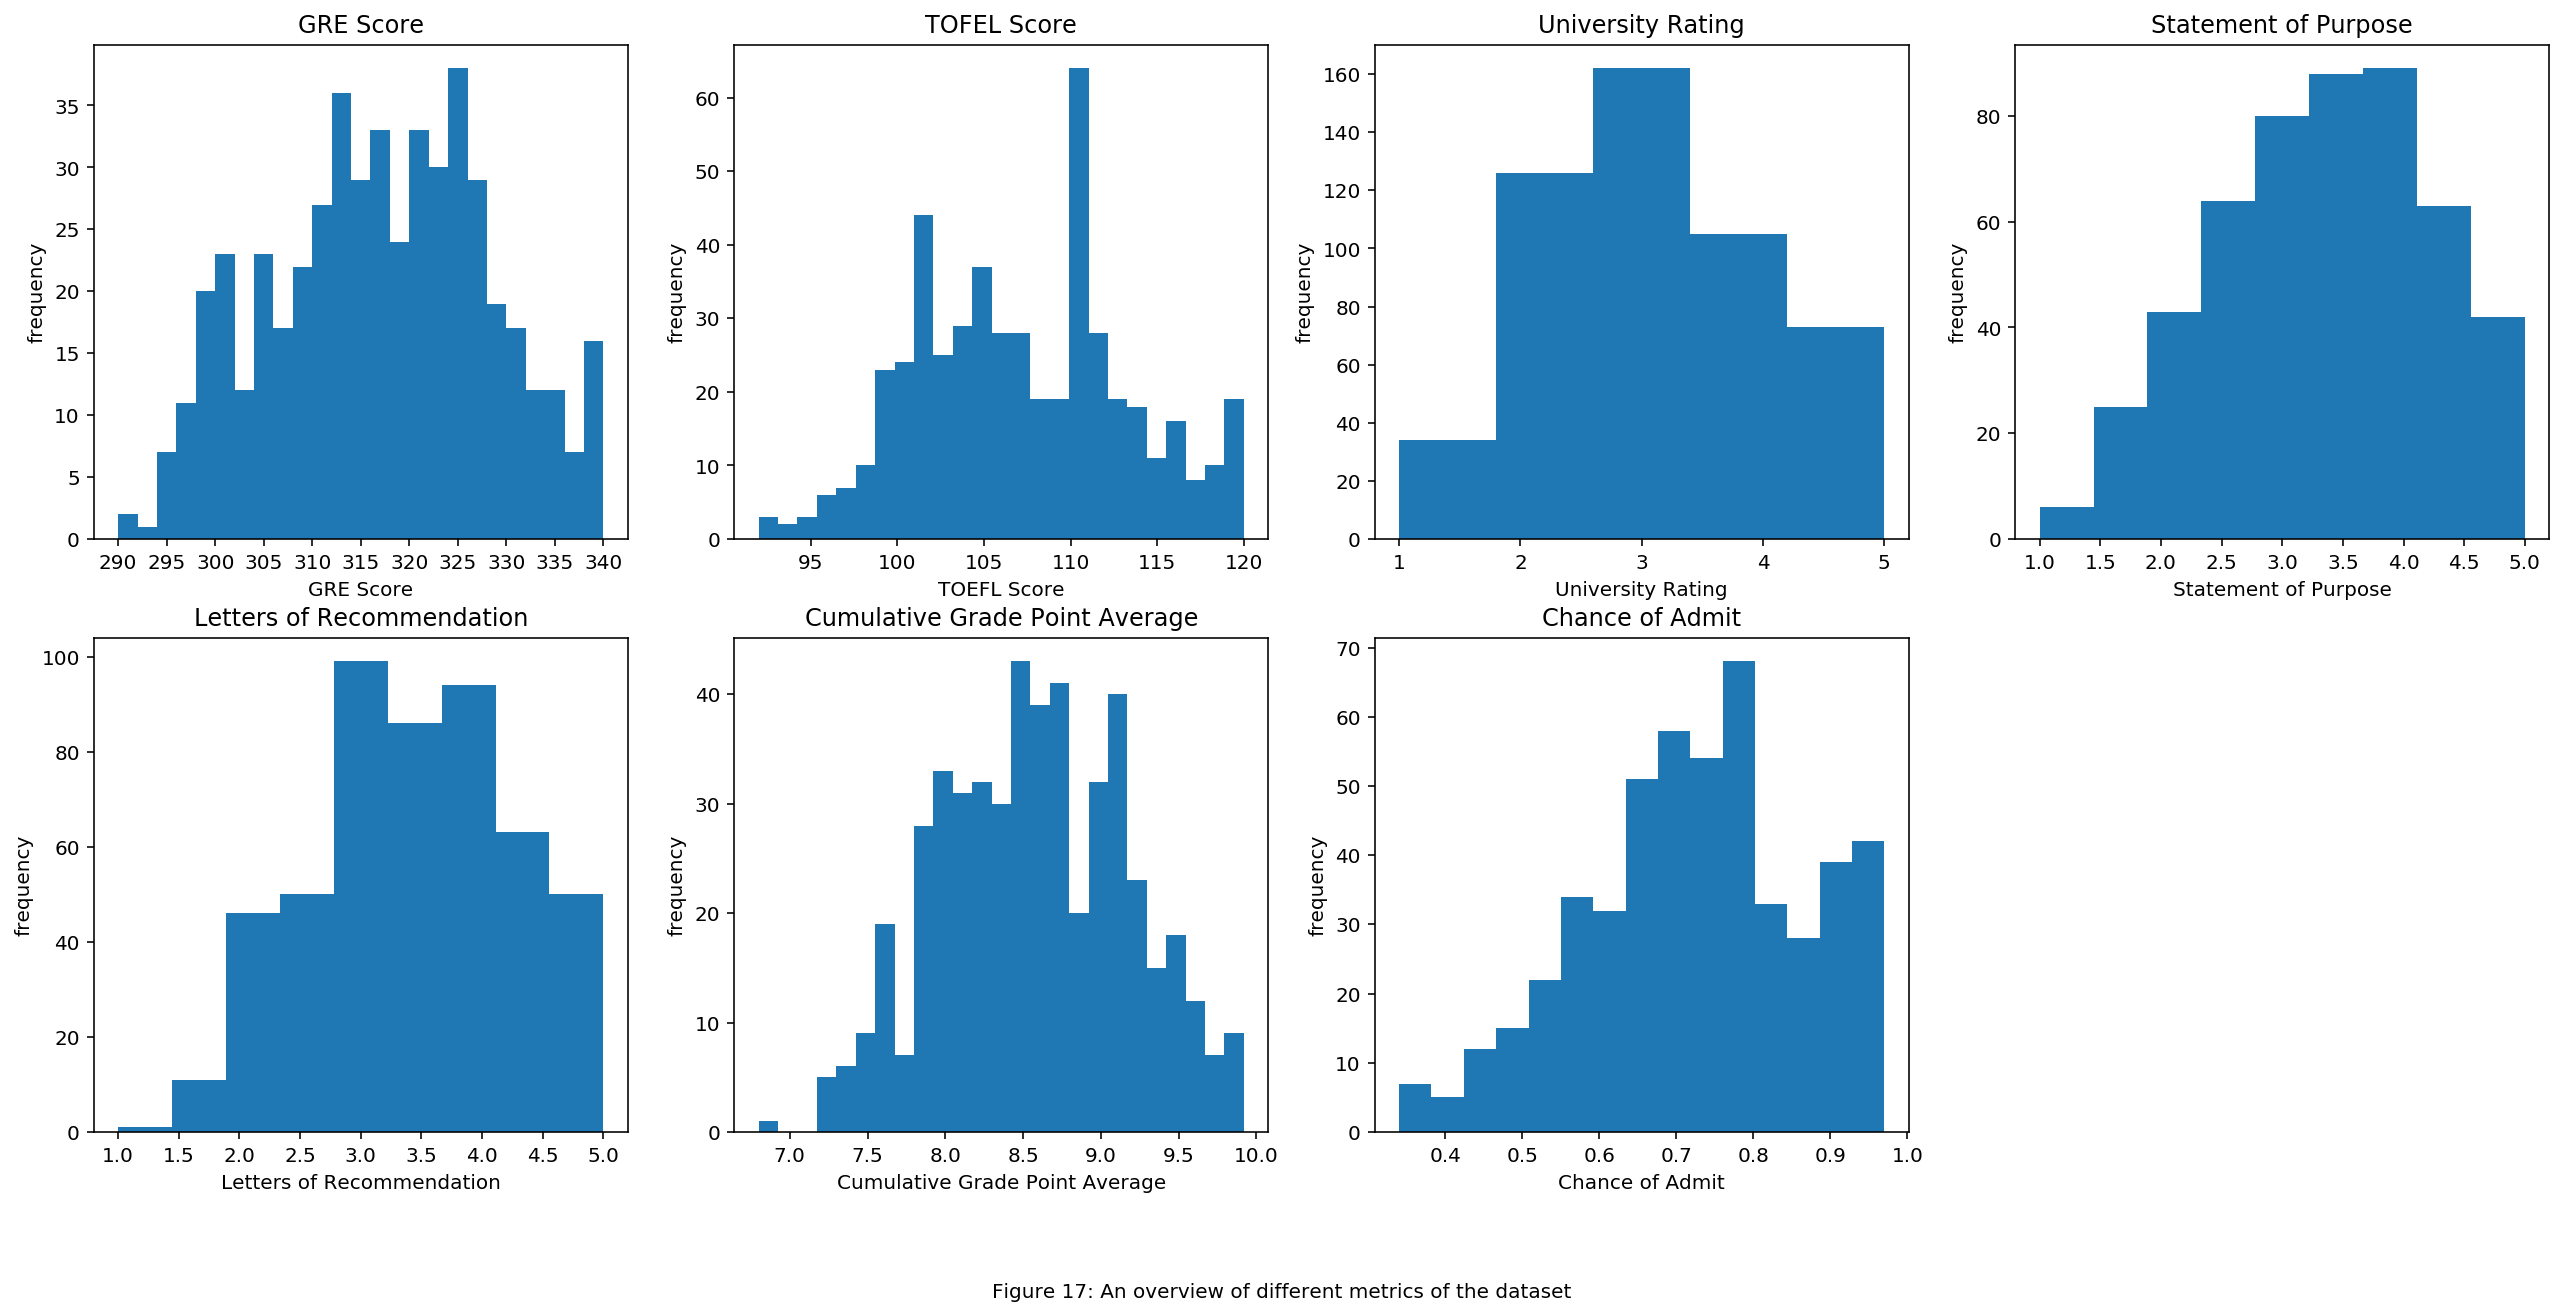

In [205]:
# Plotting the data
fig = plt.figure(figsize=(22, 10))
plt.subplot(2,4,1);plt.xticks(np.arange(290, 341, 5.0));plt.ylabel('frequency');plt.xlabel('GRE Score');plt.hist(df['GRE Score'], bins = 25);plt.title('GRE Score')

plt.subplot(2,4,2);plt.xticks(np.arange(90, 121, 5.0));plt.ylabel('frequency');plt.xlabel('TOEFL Score');plt.hist(df['TOEFL Score'], bins = 25);plt.title('TOFEL Score')

plt.subplot(2,4,3);plt.xticks(np.arange(1, 6, 1.0));plt.ylabel('frequency');plt.xlabel('University Rating');plt.hist(df['University Rating'], bins = 5);plt.title('University Rating')

plt.subplot(2,4,4);plt.xticks(np.arange(1, 6, 0.5));plt.ylabel('frequency');plt.xlabel('Statement of Purpose');plt.hist(df['SOP'], bins = 9);plt.title('Statement of Purpose')

plt.subplot(2,4,5);plt.xticks(np.arange(1, 6, 0.5));plt.ylabel('frequency');plt.xlabel('Letters of Recommendation');plt.hist(df['LOR'], bins = 9);plt.title('Letters of Recommendation')

plt.subplot(2,4,6);plt.xticks(np.arange(6, 11, 0.5));plt.ylabel('frequency');plt.xlabel('Cumulative Grade Point Average');plt.hist(df['CGPA'], bins = 25);plt.title('Cumulative Grade Point Average')

plt.subplot(2,4,7);plt.xticks(np.arange(0, 1.1, 0.1));plt.ylabel('frequency');plt.xlabel('Chance of Admit');plt.hist(df['Chance of Admit'], bins = 15);plt.title('Chance of Admit')

fig.text(.5, .01, 'Figure 17: An overview of different metrics of the dataset', ha='center')

plt.show()

***(c)***

***The target variable is Chance of Admit. The predictors are GRE, TOFEL, University Rating, Score of Statement of Purpose, Score of Letters of Recommendation, CGPA, and whether they attend research.***

***The data is cleaned and with no missing value. However, it needs to be centered but don't need to be normalized.***

***(d)***

***I will use a linear regression model to fit the data, because most of the variables are continues variables and under the assumption of normality, also they seems to have linear relationships (or I try to find such relationships). More importantly, the target variable is continues.***

***(e)***

***I will use $R^2$ to evaluate the performance. If the $R^2$ is some what close to 1, that means my model actually predict well.***

***(f)***

***I will use a crossvalidation to validate the model accuracy. Since I only have one dataset and the sample size is small, crossvalidation would be a better choice to see the model performance more accurately, also it could prevent overfitting. Specifically, I will use a Leave One Out Validation.***

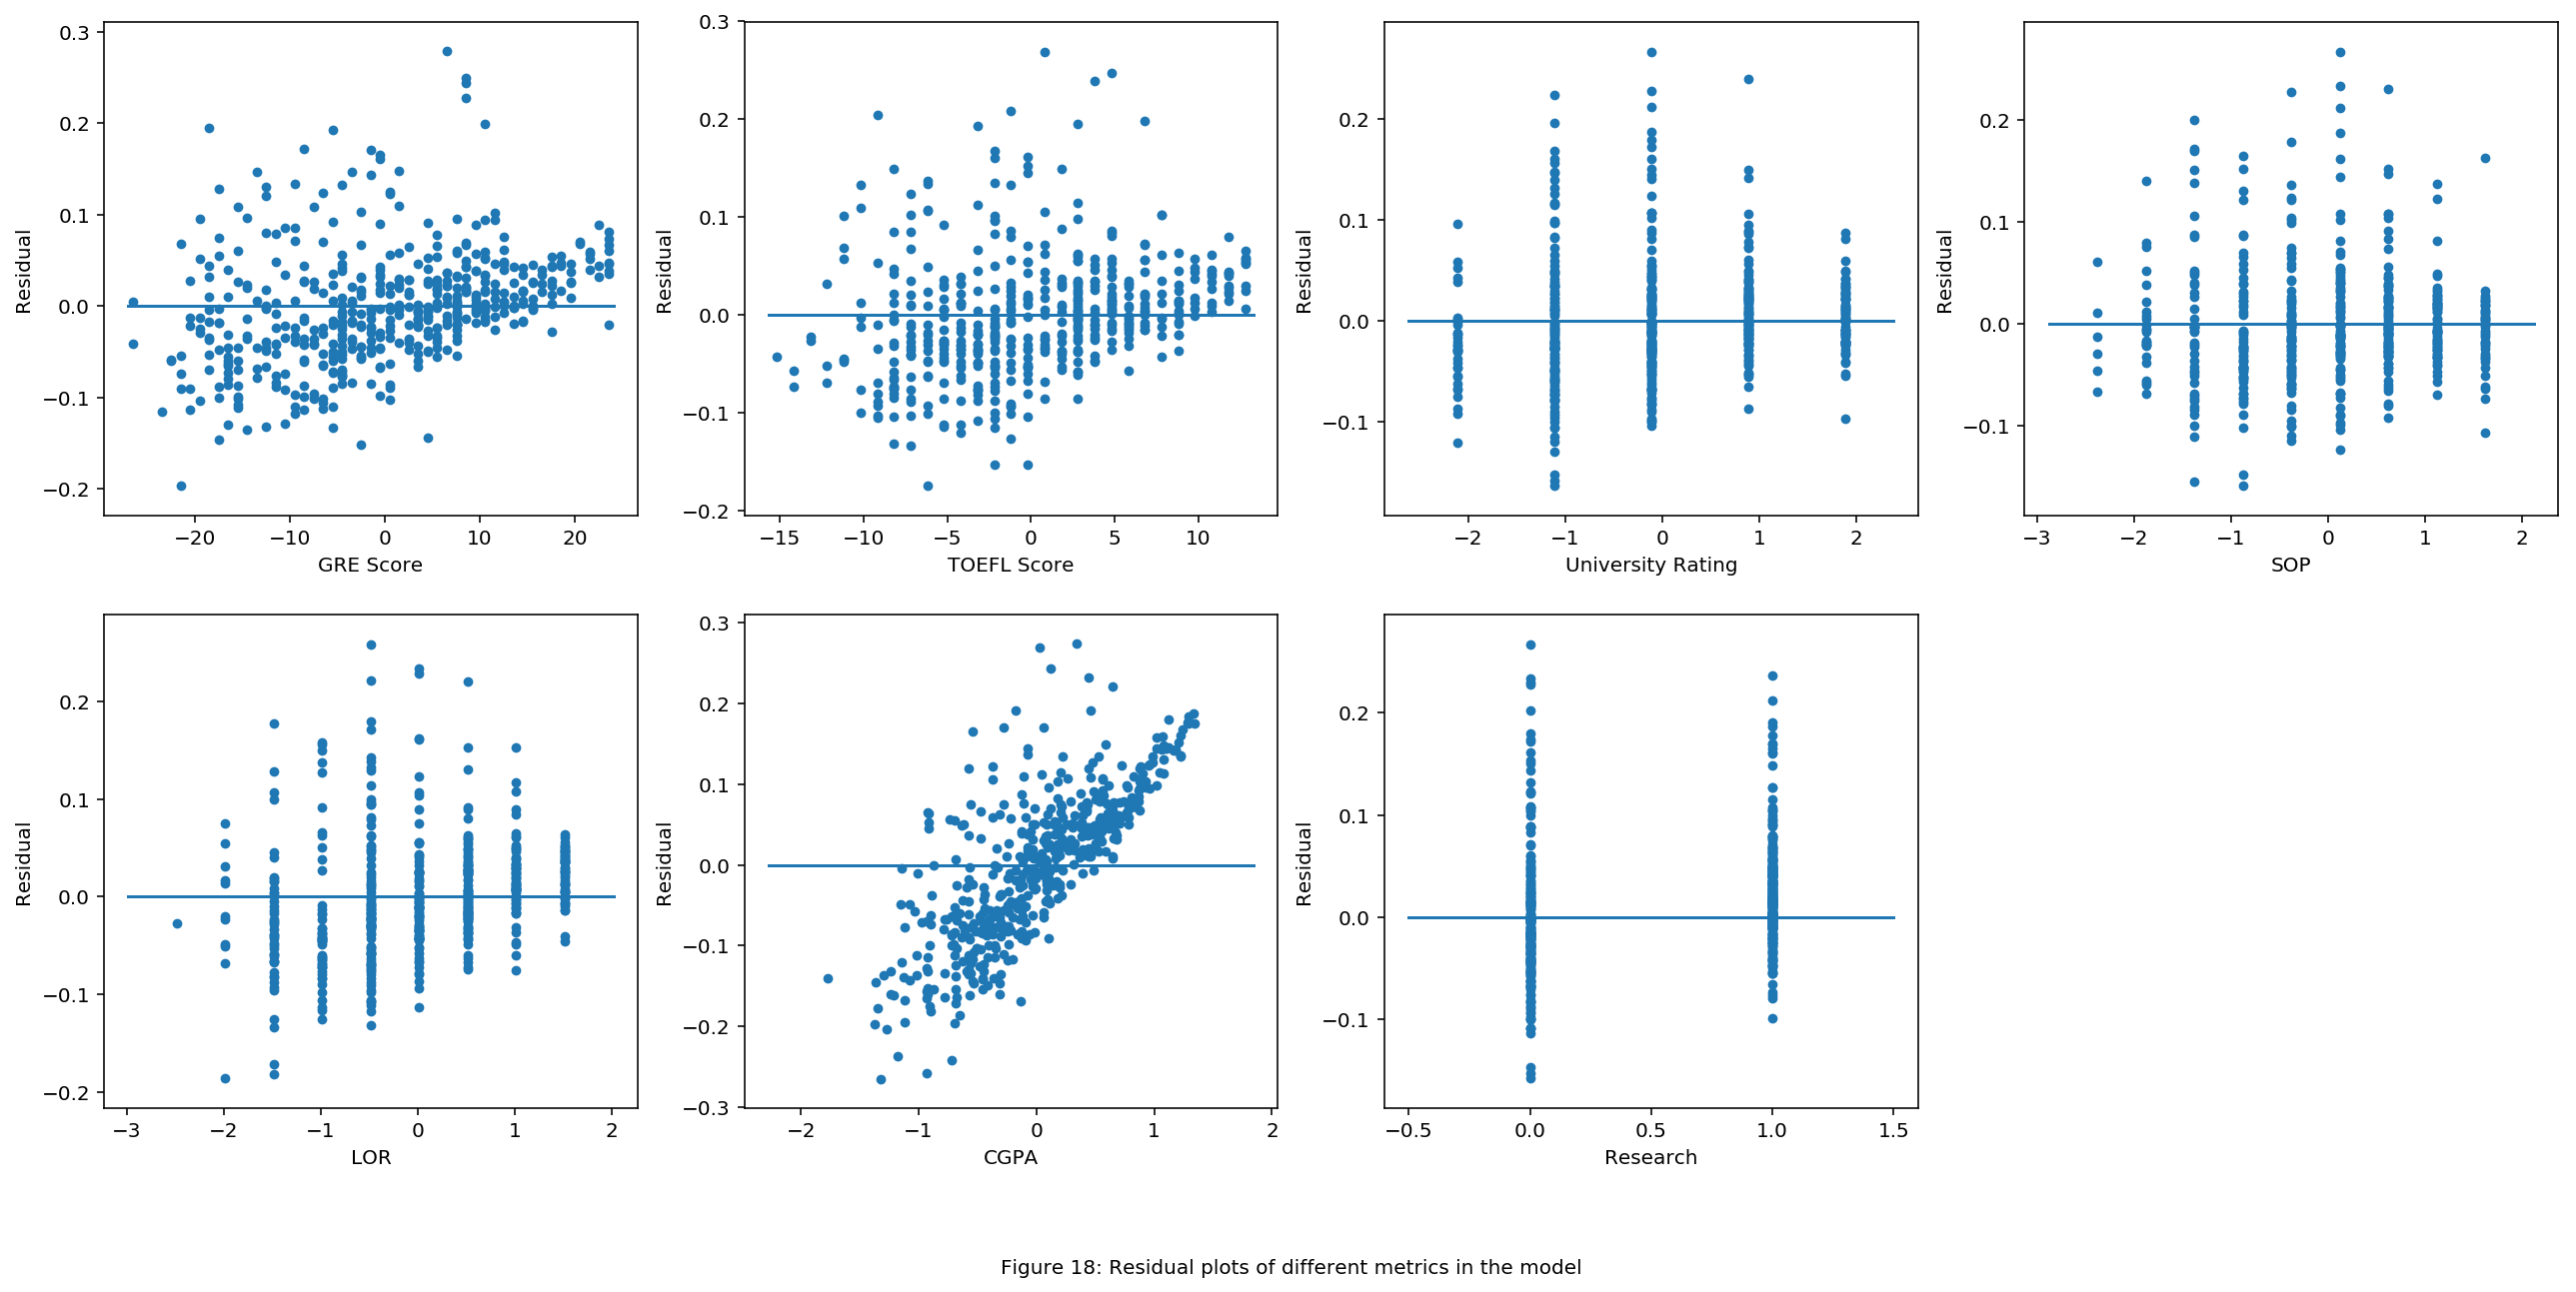

In [206]:
#(g) Analysis
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import r2_score

train = df.iloc[:,1:8]
# Centering data (for better interpretation)
train.iloc[:,0:6] = train.iloc[:,0:6].subtract(train.iloc[:,0:6].mean())

# Separating data and labels
X = train.values

y = df['Chance of Admit'].values

# Creating regression object and train
reg = LinearRegression().fit(X, y)
pred = reg.predict(X)
resid = pred - y
regcoef = reg.coef_

# Plotting residuals
x_label = df.columns.values[1:8]
fig = plt.figure(figsize=(22, 10))
for idx, coef in enumerate(reg.coef_):
    plt.subplot(2, 4, idx+1)
    partial_resid = resid + coef * X.T[idx]
    x_min, x_max = np.min(X.T[idx])-0.5, np.max(X.T[idx])+0.5
    plt.scatter(X.T[idx], partial_resid, s = 15)
    plt.plot([x_min, x_max], [0, 0])
    plt.ylabel('Residual');plt.xlabel(x_label[idx])
fig.text(.5, .01, "Figure 18: Residual plots of different metrics in the model", ha='center')
plt.show()


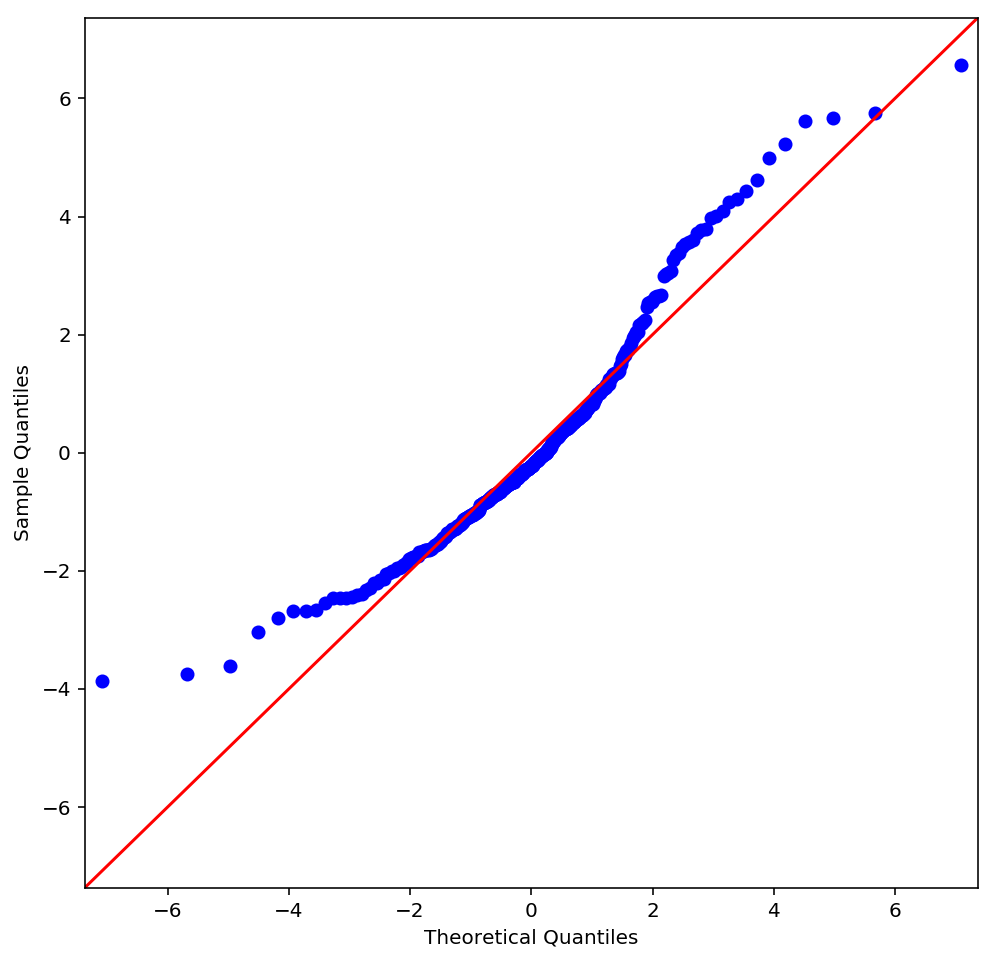

In [207]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib as mpl
with mpl.rc_context():
    mpl.rc("figure", figsize=(8,8))
    sm.qqplot(resid, stats.t, fit=True, line='45')
fig.text(.5, .01, "Figure 19: Residual QQplot", ha='center')
plt.show()

***The residual plots above show no clear trend of logarithm and quadratic transformation needed in the model. The model is overall doing fine. The QQplot shows that the majority of the data satisfied the normality assumption, and given the data size is moderate (500), the model is doing good.***

In [208]:
# Leave One Out Cross-Validation
for train_i, val_i in LeaveOneOut().split(X):
    train_X = X[train_i]
    train_y = y[train_i]
    v_X = X[val_i]
    df.loc[val_i, 'cv'] = LinearRegression().fit(train_X, train_y).predict(v_X)
print('The leave one out cross-validation achieved an R2 score of:',r2_score(y, df.cv))

The leave one out cross-validation achieved an R2 score of: 0.8158777127619616


In [209]:
# Reporting Weights
weights = list(zip(x_label, regcoef))
print('The weights for the model is:', *weights, sep='\n')
print('The chance of admit of a student with all average level scores and no reseach experience is:', reg.intercept_)

The weights for the model is:
('GRE Score', 0.0018585064850102136)
('TOEFL Score', 0.0027779723914195674)
('University Rating', 0.005941368040176728)
('SOP', 0.0015861374557666673)
('LOR', 0.0168587423524187)
('CGPA', 0.1183850534577381)
('Research', 0.024307478582166007)
The chance of admit of a student with all average level scores and no reseach experience is: 0.7081278119939874


***(h) Model evaluation: As the diagnosis on the residual plots and qqplots show, the linear model did pretty well on fitting and predicting data. It achieved an 82% Cross Validation score, which is a pretty nice score for human-society related (generated) datasets. The model is going to have around 82% accuracy on predicting new students' chance of admit according to his scores.***

***However, there are some thing that can be improved. Some of the scores, GRE, TOFEL, CGPA seems to be having a fanning in trend in the residual plot, which can be fixed but in a very sophisticated and statistical way, and the result will be slightly improved. Also, as the plots shown in the EDA, some atttributes have several peaks in their distribution, which is reasonable (for example students would like to take TOFEL again unnless they reached 110), but it will, to some extent, affect the model's performance and bias the predictions.***

***(i) This is a linear regression model to predict the chance of admit to graduate school according to students' GRE, TOFEL, University Ranking, Statement of Purposes, Letters of Recommendation, CGPA and their research experiences.***

***Key Takeaways: ***

***1. All those predictors mentioned have positive effects on being admitted by graduate school.***

***2. The chance of admit of a student in this sample with all average level scores and no reseach experience is 70.8%.***

***3. From the weights above we can see that CGPA affect the chance of admit the most, which is almost 5 times more than the second strongest predictor's weight! Followed by Research, Letters of Recommendation, University Rating, TOFEL Score, GRE score, and last but not least, Statement of Purpose.***

***4. For those students worrying about their GRE, TOFEL scores: With every 10 score increase in GRE score, the chance of admit increases by 1.8%; With every 5 score increase in TOFEL score, the chance of admit increases by 2.8%; However, with every one unit increase on your CGPA (on a 10-point scale), the probability of admit increase 11.8%! So instead of taking so much time on the former two tests, think more about raising your CGPA while you still can!***